# Importing libraries for analysis

In [6]:
# importing Python modules for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# setting enhanced values for "max columns and rows" to be displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/loan.csv


# Understanding Data and cleaning

In [7]:
# reading the dataframe and printing top 5 records
loan_df = pd.read_csv("loan.csv", low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# printing the bottom 5 records of the loan_df

loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.00,0.00,11,0,9698,19.40%,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
# dimension of the dataframe (Shape)
loan_df.shape

(39717, 111)

In [10]:
# printing the mean of not null values per column in descending order

loan_df_null_mean = (100* loan_df.isna().mean().sort_values(ascending = False))
loan_df_null_mean

verification_status_joint        100.00
annual_inc_joint                 100.00
mo_sin_old_rev_tl_op             100.00
mo_sin_old_il_acct               100.00
bc_util                          100.00
bc_open_to_buy                   100.00
avg_cur_bal                      100.00
acc_open_past_24mths             100.00
inq_last_12m                     100.00
total_cu_tl                      100.00
inq_fi                           100.00
total_rev_hi_lim                 100.00
all_util                         100.00
max_bal_bc                       100.00
open_rv_24m                      100.00
open_rv_12m                      100.00
il_util                          100.00
total_bal_il                     100.00
mths_since_rcnt_il               100.00
open_il_24m                      100.00
open_il_12m                      100.00
open_il_6m                       100.00
open_acc_6m                      100.00
tot_cur_bal                      100.00
tot_coll_amt                     100.00


In [11]:
# printing only the value without null values and will be dropping the columns with more than 30% empty value for further analysis.
# the nearest cut off is "desc" column which will not add value for this analysis.

# drop is used with two parameter axis = 1 for dropping column and inplace set as True to make the drop and save it.

loan_df_cleaned = loan_df.drop(loan_df_null_mean[loan_df_null_mean>30].index, axis =1)
loan_df_cleaned.reset_index()
loan_df_cleaned.shape
# The columns after dropping the null records stands at 53

(39717, 53)

In [12]:
#  comparing the column size before and after dropping the columns with null values.
print(loan_df.shape)
print(loan_df_cleaned.shape)

(39717, 111)
(39717, 53)


In [13]:
#  rechecking the values with not null values, the majority of them should not be reflecting. Further imputations will be done later.

100* loan_df_cleaned.isna().mean().sort_values(ascending = False).head(15)

emp_title                    6.19
emp_length                   2.71
pub_rec_bankruptcies         1.75
last_pymnt_d                 0.18
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
revol_util                   0.13
tax_liens                    0.10
title                        0.03
last_credit_pull_d           0.01
total_rec_prncp              0.00
out_prncp                    0.00
initial_list_status          0.00
out_prncp_inv                0.00
total_acc                    0.00
dtype: float64

In [14]:
# checking for unique values in the non null, the top entries will not be helping much as they are kind 
# of fixed for all the rows (till the payment_plan from the top).

loan_df_cleaned.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [15]:
# removing the columns with exactly one value for all the rows.
loan_df_cleaned.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)
loan_df_cleaned.shape


(39717, 44)

In [16]:
loan_df_cleaned.nunique().sort_values(ascending=True)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [17]:
#  emp_title, title has the name of borrower which is not supporting in our analysis
#  url and member_id are unique per customer and similar id field is kept for uniue reference. Dropping other two columns.

loan_df_cleaned.drop(['emp_title', 'title','member_id', 'url'], axis=1, inplace=True)
loan_df_cleaned.shape

(39717, 40)

In [18]:
#  checking the missing values as percentage
100* loan_df_cleaned.isna().mean().sort_values(ascending = False).head(15)


emp_length             2.71
pub_rec_bankruptcies   1.75
last_pymnt_d           0.18
revol_util             0.13
last_credit_pull_d     0.01
total_pymnt            0.00
pub_rec                0.00
revol_bal              0.00
total_acc              0.00
out_prncp              0.00
out_prncp_inv          0.00
total_rec_prncp        0.00
total_pymnt_inv        0.00
inq_last_6mths         0.00
total_rec_int          0.00
dtype: float64

In [19]:
# removing the null values from the above list, these are less in number hence not putting any imputations.
loan_df_cleaned.dropna(subset=['emp_length','pub_rec_bankruptcies','last_pymnt_d','revol_util','last_credit_pull_d'], inplace=True)



In [20]:
# dimension after removing the null values
print(loan_df_cleaned.shape)
print(100* loan_df_cleaned.isna().mean().sort_values(ascending = False).head(3))

(37835, 40)
id          0.00
loan_amnt   0.00
open_acc    0.00
dtype: float64


In [21]:
#  removing the "current" values from loan_status
loan_df_cleaned = loan_df_cleaned.loc[loan_df_cleaned['loan_status']!= "Current"]   #[loan_df_cleaned['loan_status']!= "Current"]
loan_df_cleaned.shape

(36737, 40)

In [22]:
#  confirming no current data is in the list
loan_df_cleaned[loan_df_cleaned.loan_status=='Current'].shape

(0, 40)

In [23]:
# #  dropping below columns due to below reason
# id id value 
# out_prncp This is for current running loan which is not applicable 
# out_prncp_inv This is for current running loan which is not applicable 
# total_rec_prncp This is for current running loan which is not applicable 
# total_rec_int This is for current running loan which is not applicable
# total_rec_late_fee This is for current running loan which is not applicable
# recoveries This is for charged off loan not applicable for our study
# collection_recovery_fee This is for charged off loan not applicable for our study 
# last_pymnt_d Last month payment was received
# last_pymnt_amnt Last total payment amount received
# last_credit_pull_d The most recent month LC pulled credit for this loan
# delinq_2yrs The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
# earliest_cr_line The month the borrower's earliest reported credit line was opened
# inq_last_6mths The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
# open_acc The number of open credit lines in the borrower's credit file.


loan_df_cleaned.drop(['id','out_prncp','out_prncp_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                         'last_credit_pull_d','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc'], axis =1, inplace=True)

In [24]:
#  checking the missing values as percentage
loan_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36737 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36737 non-null  int64  
 1   funded_amnt           36737 non-null  int64  
 2   funded_amnt_inv       36737 non-null  float64
 3   term                  36737 non-null  object 
 4   int_rate              36737 non-null  object 
 5   installment           36737 non-null  float64
 6   grade                 36737 non-null  object 
 7   sub_grade             36737 non-null  object 
 8   emp_length            36737 non-null  object 
 9   home_ownership        36737 non-null  object 
 10  annual_inc            36737 non-null  float64
 11  verification_status   36737 non-null  object 
 12  issue_d               36737 non-null  object 
 13  loan_status           36737 non-null  object 
 14  purpose               36737 non-null  object 
 15  zip_code              36

In [25]:
#  no data for the current applications
loan_df_cleaned[loan_df_cleaned['loan_status']=='Current'].head(4)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies


In [26]:
#  checking the top 4 records 
loan_df_cleaned.head(4)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,13648,83.70%,9,5863.16,5833.84,0.00
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,1687,9.40%,4,1008.71,1008.71,0.00
2,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,2956,98.50%,10,3005.67,3005.67,0.00
3,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,5598,21%,37,12231.89,12231.89,0.00


**Cleaning data content and data types**

In [27]:
# Columns like int_rate has %, term has months/other texts and revol_util has % removing this and changing the data type to int.
loan_df_cleaned['int_rate'] = loan_df_cleaned['int_rate'].str.replace("%", "").astype('float')
loan_df_cleaned['revol_util'] = loan_df_cleaned['revol_util'].str.replace("%", "").astype('float')
loan_df_cleaned['term'] = loan_df_cleaned['term'].str.replace("months", "").astype('int')

**Changing date columns like issue_d to date type**

In [28]:
loan_df_cleaned['issue_d'] = pd.to_datetime(loan_df_cleaned['issue_d'],format='%b-%y', errors='coerce')

In [29]:
#  checking the top 6 records
loan_df_cleaned.head(6)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.00,36,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,13648,83.70,9,5863.16,5833.84,0.00
1,2500,2500,2500.00,60,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1687,9.40,4,1008.71,1008.71,0.00
2,2400,2400,2400.00,36,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2956,98.50,10,3005.67,3005.67,0.00
3,10000,10000,10000.00,36,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,5598,21.00,37,12231.89,12231.89,0.00
5,5000,5000,5000.00,36,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,7963,28.30,12,5632.21,5632.21,0.00
6,7000,7000,7000.00,60,15.96,170.08,C,C5,8 years,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,280xx,NC,23.51,0,17726,85.60,11,10110.84,10110.84,0.00


In [30]:
#  checking the missing values as percentage
loan_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36737 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36737 non-null  int64         
 1   funded_amnt           36737 non-null  int64         
 2   funded_amnt_inv       36737 non-null  float64       
 3   term                  36737 non-null  int64         
 4   int_rate              36737 non-null  float64       
 5   installment           36737 non-null  float64       
 6   grade                 36737 non-null  object        
 7   sub_grade             36737 non-null  object        
 8   emp_length            36737 non-null  object        
 9   home_ownership        36737 non-null  object        
 10  annual_inc            36737 non-null  float64       
 11  verification_status   36737 non-null  object        
 12  issue_d               36737 non-null  datetime64[ns]
 13  loan_status          

**Creating derived metrics from the existing columns**

In [31]:
#  Adding 4 columns, month,year and quarter from the issue_d column

loan_df_cleaned['month'] = pd.DatetimeIndex(loan_df_cleaned['issue_d']).month
loan_df_cleaned['year'] = pd.DatetimeIndex(loan_df_cleaned['issue_d']).year
loan_df_cleaned['quarter'] = loan_df_cleaned.issue_d.dt.quarter

#  Adding a binning for loan amount.
bins = [0, 5100, 10100, 15100, 20100,25100,30100,35100]
loan_df_cleaned['loan_bin'] = pd.cut(loan_df_cleaned['loan_amnt'], bins)

#  Adding a binning for DTI amount.

bins_dti = [0, 5, 10, 15, 20,25,30,35]
loan_df_cleaned['dti_bin'] = pd.cut(loan_df_cleaned['dti'], bins_dti)

In [32]:
# checking the content and verifying the details. 
loan_df_cleaned.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,month,year,quarter,loan_bin,dti_bin
0,5000,5000,4975.00,36,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,13648,83.70,9,5863.16,5833.84,0.00,12,2011,4,"(0, 5100]","(25, 30]"
1,2500,2500,2500.00,60,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1687,9.40,4,1008.71,1008.71,0.00,12,2011,4,"(0, 5100]","(0, 5]"
2,2400,2400,2400.00,36,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2956,98.50,10,3005.67,3005.67,0.00,12,2011,4,"(0, 5100]","(5, 10]"


**Checking for outliers** 

In [33]:
# checking outlier for various amount/number values.
def calculate_outliers(df_name, col_name):
    
#   print("before removing outlier shape")
    print(f"Shape of dataframe before removing outlier shape{df_name.shape}")
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_name[col_name].quantile(0.25)
    Q3 = df_name[col_name].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_name.drop(df_name[(df_name[col_name] <= lower_bound) | (df_name[col_name] >= upper_bound)].index, inplace =True)
    print(f"Shape of dataframe after removing outlier shape{df_name.shape}")

In [34]:
calculate_outliers(loan_df_cleaned,'loan_amnt')
calculate_outliers(loan_df_cleaned,'funded_amnt')
calculate_outliers(loan_df_cleaned,'annual_inc')
calculate_outliers(loan_df_cleaned,'total_pymnt')
calculate_outliers(loan_df_cleaned,'revol_bal')

Shape of dataframe before removing outlier shape(36737, 30)
Shape of dataframe after removing outlier shape(35661, 30)
Shape of dataframe before removing outlier shape(35661, 30)
Shape of dataframe after removing outlier shape(35631, 30)
Shape of dataframe before removing outlier shape(35631, 30)
Shape of dataframe after removing outlier shape(33884, 30)
Shape of dataframe before removing outlier shape(33884, 30)
Shape of dataframe after removing outlier shape(32979, 30)
Shape of dataframe before removing outlier shape(32979, 30)
Shape of dataframe after removing outlier shape(31154, 30)


In [35]:
#  Final shape of the dataframe
loan_df_cleaned.shape

(31154, 30)

In [36]:
#  check for duplicate data

loan_df_cleaned[loan_df_cleaned.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,month,year,quarter,loan_bin,dti_bin


No duplicate data present in dataset

# Univariate Analysis 
(one variable analysis)


In [37]:
#  creating a custom function to create box plot and histogram plot using subplot for further usage.

def plot_box_dist(df_name, col_name, title_name, annot=False):
    # setting size of figure
    plt.figure(figsize=(13,5))
    #first subplot
    plt.subplot(1,2,1)
    #Dist plot
    ax = sns.histplot(data=df_name[col_name], kde=True,color="dodgerblue")
    # Annotate the values on the count
    if annot is True:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 80 , f'{int(height)}', ha="center",rotation= 55)
        
    # 2nd sub plot
    plt.subplot(1,2,2)
    #Box plot
    sns.boxplot(data=df_name[col_name],color="dodgerblue")
    plt.xlabel(col_name)
    #Title
    plt.suptitle(title_name)
    # setting non scientific notion in plot display
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    
    print(df_name[col_name].describe())    
    

1. Loan Amount

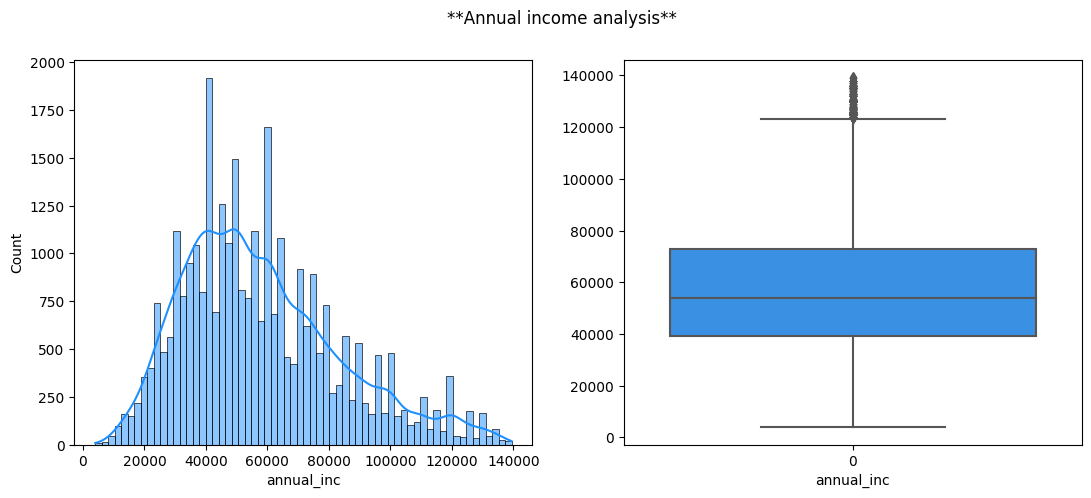

count    31154.00
mean     57961.10
std      25625.39
min       4000.00
25%      39222.00
50%      54000.00
75%      72833.60
max     139380.00
Name: annual_inc, dtype: float64


In [38]:
# analyzing annual Salary
plot_box_dist(loan_df_cleaned, 'annual_inc', "**Annual income analysis**")



**Observations from above plot:**

The median annual income stands close to 50000 and there are few outliers after removing them earlier. Earlier they were close 6000000 and some have salary more than 1000000


2. Annual Salary

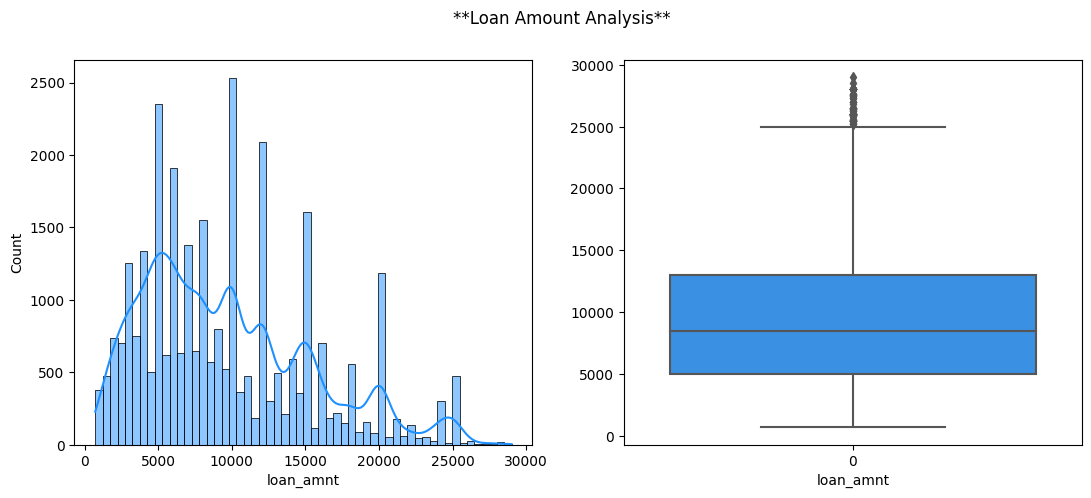

count   31154.00
mean     9660.49
std      5715.38
min       725.00
25%      5000.00
50%      8500.00
75%     13000.00
max     29000.00
Name: loan_amnt, dtype: float64


In [39]:
# analyzing loan amount

plot_box_dist(loan_df_cleaned, 'loan_amnt', "**Loan Amount Analysis**")

**Observations from above plot:**

The median of loan amounts stands at 8000 and the outliers are removed. From the dist plot it is clear the data is right skewed.

3. Funded Amount

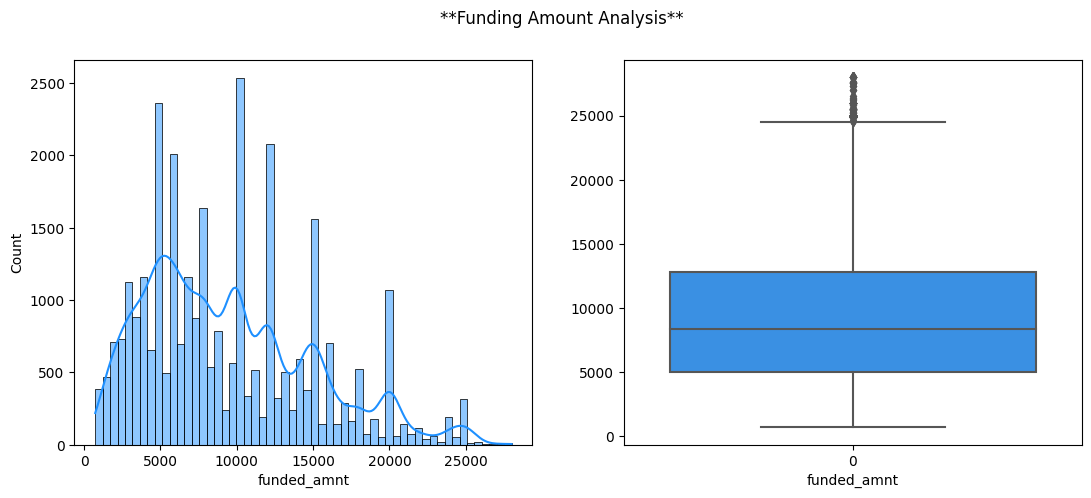

count   31154.00
mean     9453.97
std      5490.10
min       725.00
25%      5000.00
50%      8400.00
75%     12800.00
max     28000.00
Name: funded_amnt, dtype: float64


In [40]:
# analyzing Funded amount

plot_box_dist(loan_df_cleaned, 'funded_amnt', "**Funding Amount Analysis**")

**Observations from above plot:**

The median of loan amounts stands at 8000 and the outliers are removed. From the dist plot it is clear the data is right skewed. Also, the graph shows most of the loan request are funded as the graphs are similar

4. Interest Rate

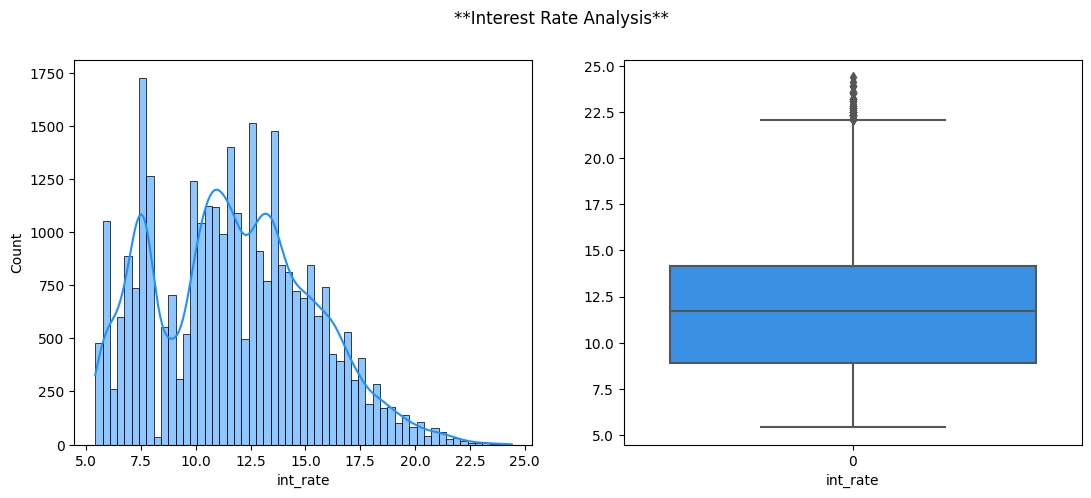

count   31154.00
mean       11.73
std         3.57
min         5.42
25%         8.90
50%        11.71
75%        14.18
max        24.40
Name: int_rate, dtype: float64


In [41]:
# analyzing Interest Rate

plot_box_dist(loan_df_cleaned, 'int_rate', "**Interest Rate Analysis**")

**Observations from above plot:**

The median of loan amounts stands at 11.71%  and some outliers showing up in box plot. From the dist plot it is clear the data is right skewed. The hightest rate is 24% and 75% percent of data has interest rate less than 15%

5. Instalment

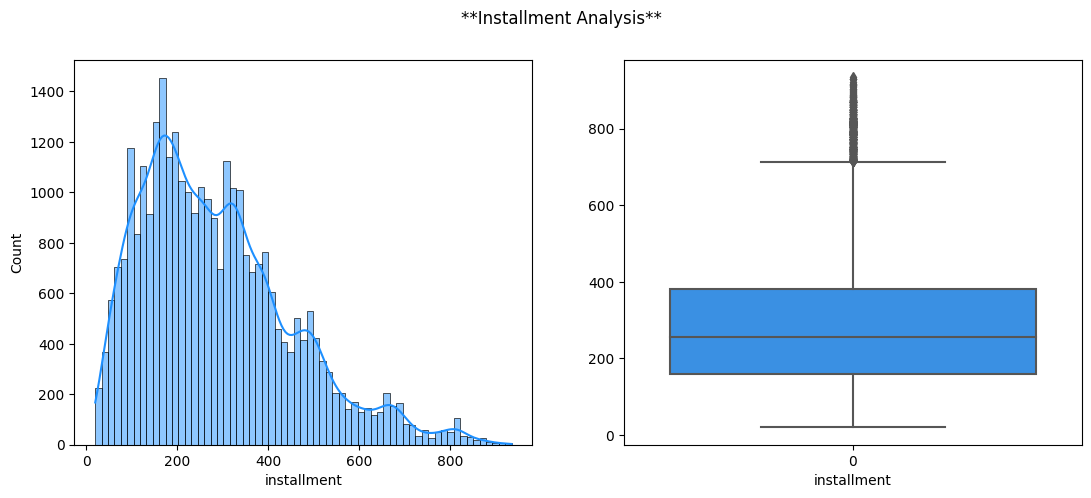

count   31154.00
mean      285.42
std       166.28
min        19.87
25%       158.97
50%       256.90
75%       380.93
max       934.55
Name: installment, dtype: float64


In [42]:
# analyzing installment

plot_box_dist(loan_df_cleaned, 'installment', "**Installment Analysis**")

**Observations from above plot:**

The median of installment amounts stands at 256 and some outliers showing up in box plot close to 800. From the dist plot it is clear the data is right skewed. The hightest stands at 934 and 75% percent of data has installment less than 15%

6. DTI

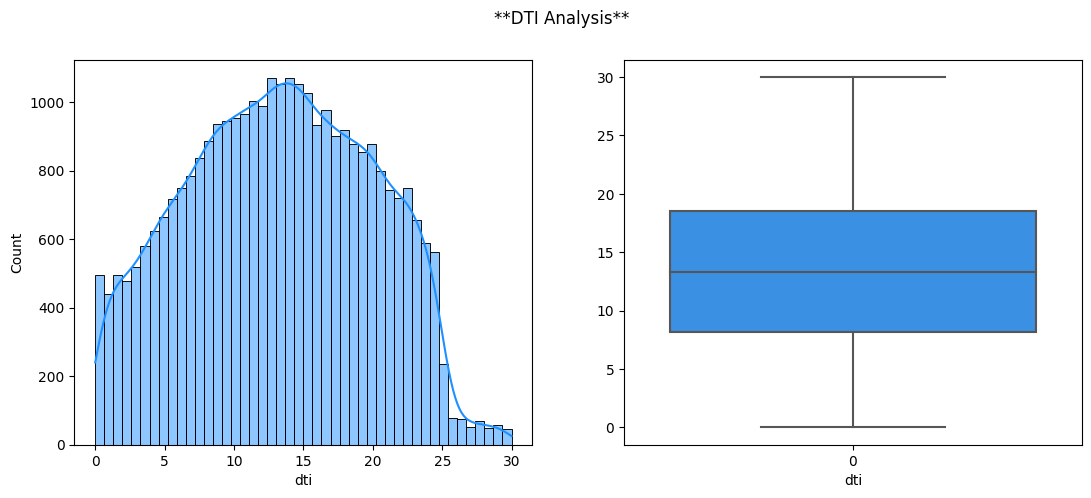

count   31154.00
mean       13.24
std         6.65
min         0.00
25%         8.12
50%        13.32
75%        18.49
max        29.99
Name: dti, dtype: float64


In [43]:
# analyzing DTI

plot_box_dist(loan_df_cleaned, 'dti', "**DTI Analysis**")

**Observations from above plot:**

The histplot is a near bell shaped curve, with median value at 13. The majority of range lies from 10 to 15. The lower value of DTI gives the lender a confidence to lend the money.

7. Revolving Balance

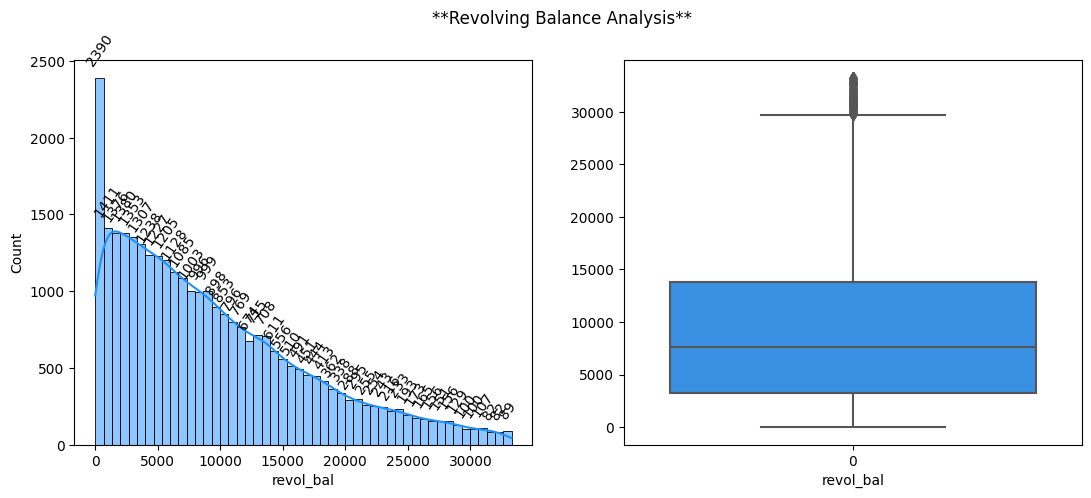

count   31154.00
mean     9416.17
std      7637.03
min         0.00
25%      3268.25
50%      7645.00
75%     13833.75
max     33287.00
Name: revol_bal, dtype: float64


In [44]:
# analyzing Revolving balance

plot_box_dist(loan_df_cleaned, 'revol_bal', "**Revolving Balance Analysis**", annot=True)

**Observations from above plot:**

The histplot show the median value at around 7000. Very few The majority of range lies from 10 to 15. The lower value of DTI gives the lender a confidence to lend the money.
Close to 100 users have DTI close to 30k.

8. Public bankrupt records

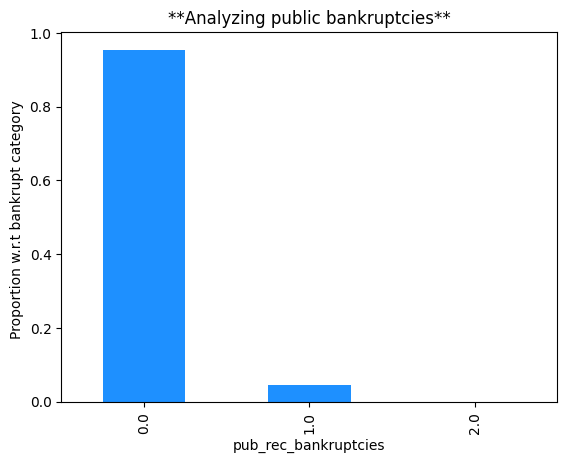

In [45]:
# analyzing public bankruptcies

loan_df_cleaned.pub_rec_bankruptcies.value_counts(normalize=True).plot.bar(color="dodgerblue")
plt.title("**Analyzing public bankruptcies**")
plt.ylabel("Proportion w.r.t bankrupt category ")
plt.show()

**Observations from above plot:**

The barplot shows that very less percentage of people have their name bankruptcies report, i.e did not get bankrupt

9. Public derogatory records

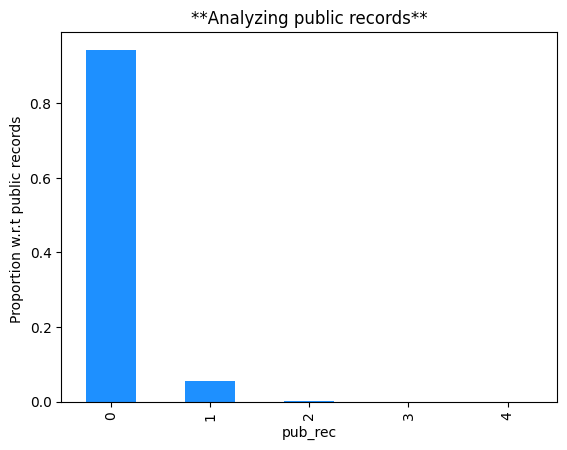

In [46]:
# analyzing pub_rec

loan_df_cleaned.pub_rec.value_counts(normalize=True).plot.bar(color="dodgerblue")
plt.title("**Analyzing public records**")
plt.ylabel("Proportion w.r.t public records ")
plt.show()

**Observations from above plot:**

The barplot shows that very less percentage of people have public derogatory records.

10. Installment  Term

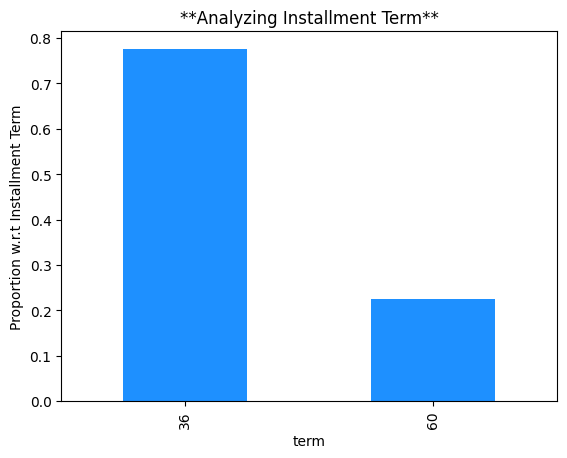

In [47]:
# analyzing term

loan_df_cleaned.term.value_counts(normalize=True).plot.bar(color="dodgerblue")
plt.title("**Analyzing Installment Term**")
plt.ylabel("Proportion w.r.t Installment Term")
plt.show()

**Observations from above plot:**

The barplot shows that very less percentage of people selected 60 months term, little more than 20%, but close to 80% have selected 36 months as term.

11. Employment duration

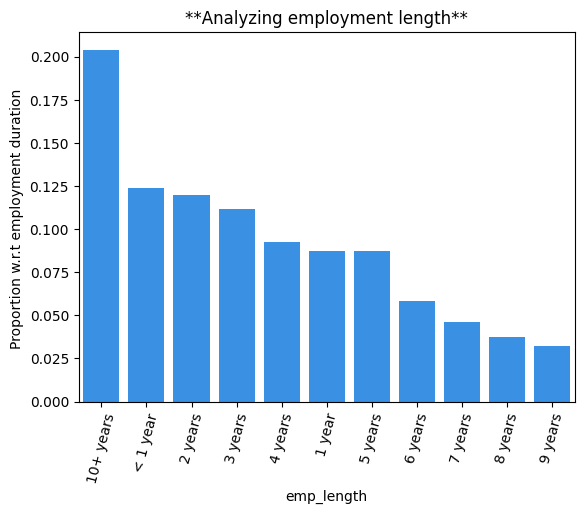

In [48]:
# analyzing employee length

value_counts = loan_df_cleaned['emp_length'].value_counts(normalize=True).reset_index()

# Create a bar plot
ax = sns.barplot(x='emp_length', y='proportion', data=value_counts,color="dodgerblue")
plt.xticks(rotation = 75)
plt.title("**Analyzing employment length**")
plt.ylabel("Proportion w.r.t employment duration ")
plt.show()
# print(value_counts)

**Observations from above plot:**

The barplot shows more than 20% of people taking loan have more than 10+ years of experience. Borrowers with experience range less than 1 to 5 years have fluctuating percentage from 12.% to close to 10. With 7, 8 and 9 years there is downward trend for borrowing money.

12. Home ownership

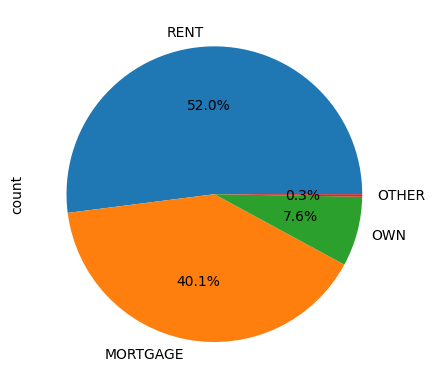

In [49]:
# home ownership analysis
loan_df_cleaned.home_ownership.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

**Observations from above plot:**

The above pie chat show the majority of borrowers are staying in rented house, followed by house which is mortgaged. Only 7.6% have own house.

13. Verification status

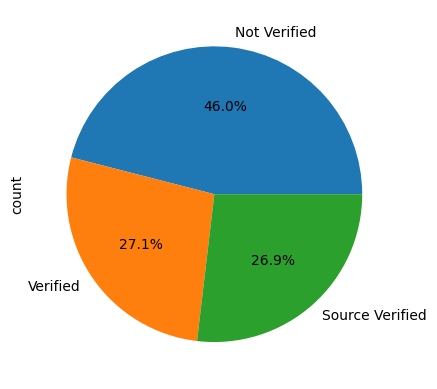

In [50]:
# home ownership analysis
loan_df_cleaned.verification_status.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

**Observations from above plot:**

The above pie chart show the majority of borrowers source is not verified, close to 46%. Other categories are close to 27%

14. Purpose of taking laon

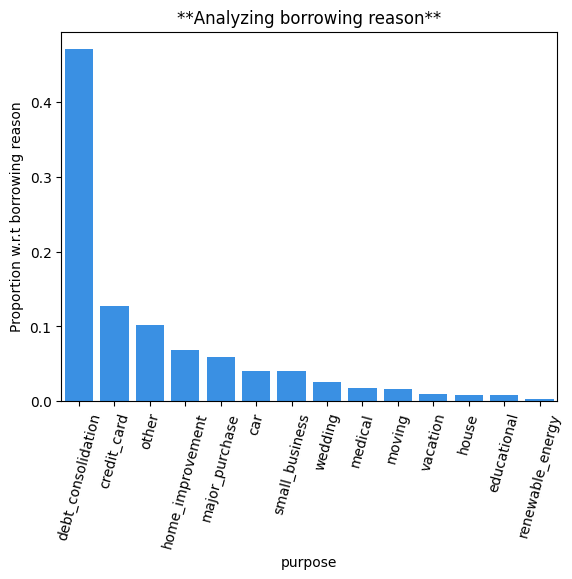

In [51]:
# analyzing purpose of taking loan

value_counts = loan_df_cleaned['purpose'].value_counts(normalize=True).reset_index()

# Create a bar plot
ax = sns.barplot(x='purpose', y='proportion', data=value_counts,color="dodgerblue")
plt.xticks(rotation = 75)
plt.title("**Analyzing borrowing reason**")
plt.ylabel("Proportion w.r.t borrowing reason")
plt.show()

**Observations from above plot:**

The above chart show the majority of borrowers reason of taking loan is debt consolidation, followed by credit card. The number goes down as well move towards right.

15. Loan issue date

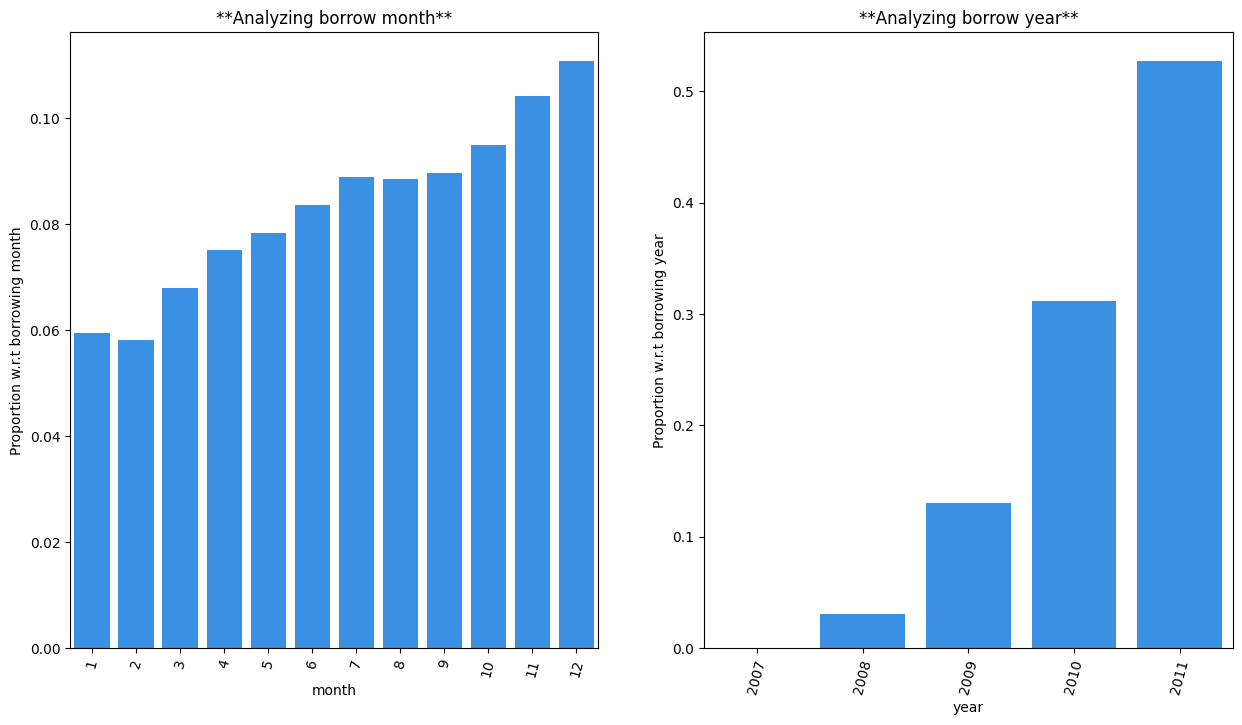

In [52]:
# analyzing loan issue date(month and year)

value_counts = loan_df_cleaned['month'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(15,8))
# Create a bar plot
plt.subplot(1,2,1)
ax = sns.barplot(x='month', y='proportion', data=value_counts,color="dodgerblue")
plt.xticks(rotation = 75)
plt.title("**Analyzing borrow month**")
plt.ylabel("Proportion w.r.t borrowing month")

value_counts_y = loan_df_cleaned['year'].value_counts(normalize=True).reset_index()
plt.subplot(1,2,2)
ax = sns.barplot(x='year', y='proportion', data=value_counts_y,color="dodgerblue")
plt.xticks(rotation = 75)
plt.title("**Analyzing borrow year**")
plt.ylabel("Proportion w.r.t borrowing year")

plt.show()

**Observations from above plot:**

The loan amount is increasing every year with a huge step size. Majority of loans were taken on the month of December followed by November.

16. Grade & Annual Income

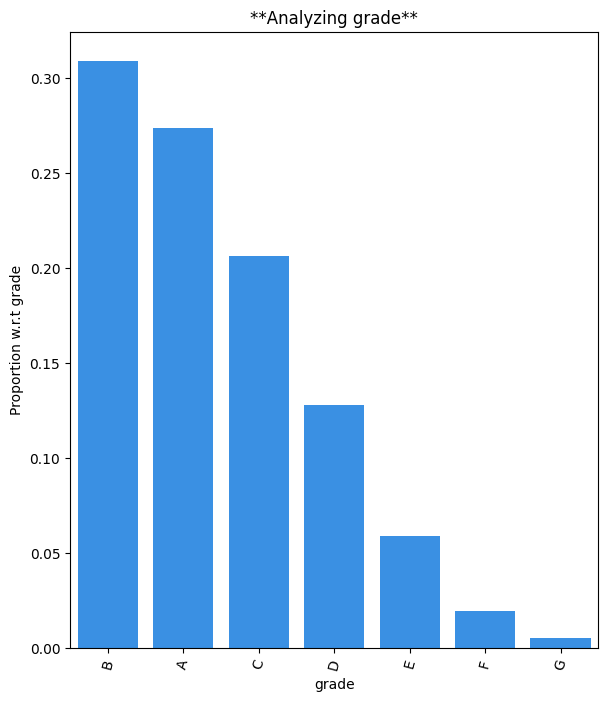

In [53]:
# analyzing grade and annual income

value_counts = loan_df_cleaned['grade'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(15,8))
# Create a bar plot
plt.subplot(1,2,1)
ax = sns.barplot(x='grade', y='proportion', data=value_counts,color="dodgerblue")
plt.xticks(rotation = 75)
plt.title("**Analyzing grade**")
plt.ylabel("Proportion w.r.t grade")

plt.show()

**Observations from above plot:**

Grade B has the highest number of borrowers, followed by Grade A. Grade G has the lowest proportion of loan.

# Segmented Univariate Analysis

1. Salary and Grade
    * Without any condition

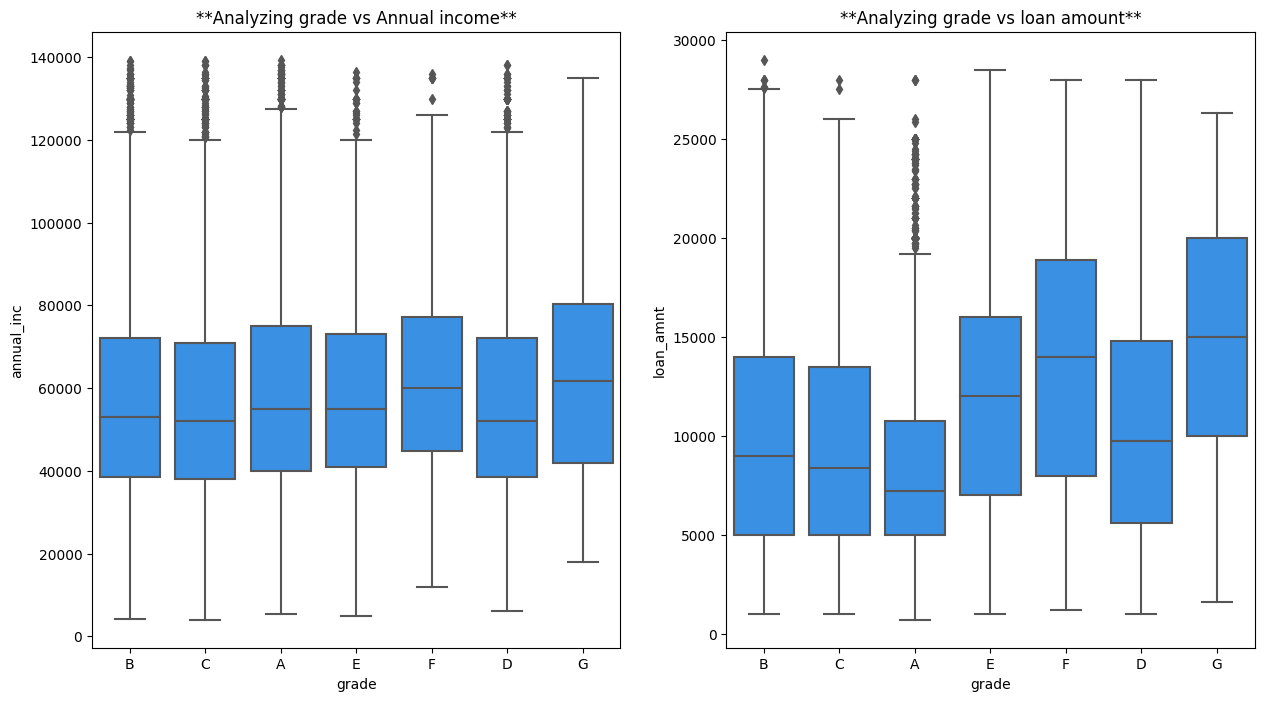

In [54]:
#  analyzing the salary and grade of borrower
#  analyzing the loan and grade of borrower
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(data=loan_df_cleaned, y = 'annual_inc', x = 'grade', color ='dodgerblue')
plt.title("**Analyzing grade vs Annual income**")

plt.subplot(1,2,2)
sns.boxplot(data=loan_df_cleaned, y = 'loan_amnt', x = 'grade', color ='dodgerblue')
plt.title("**Analyzing grade vs loan amount**")

plt.show()

**Observations from above plot:**

Grade G and F have high income is inferred from left plot, those group are taking higher amount of loan as per the right sided plot. Group A grade has taken lowest loan.

2. Salary and Grade
    * Income greater than 60000

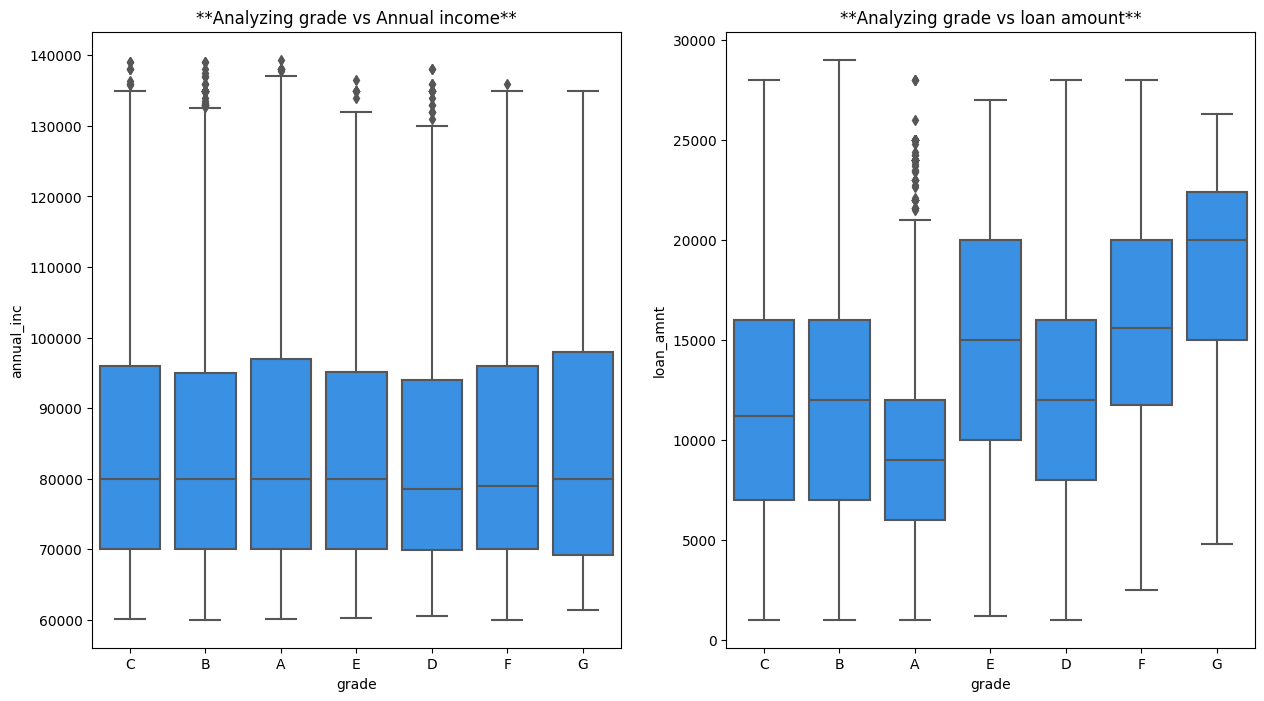

In [55]:
#  analyzing the salary and grade of borrower when income is greater than 60000
#  analyzing the loan and grade of borrower when income is greater than 60000
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(data=loan_df_cleaned[loan_df_cleaned['annual_inc']>60000], y = 'annual_inc', x = 'grade', color ='dodgerblue')
plt.title("**Analyzing grade vs Annual income**")

plt.subplot(1,2,2)
sns.boxplot(data=loan_df_cleaned[loan_df_cleaned['annual_inc']>60000], y = 'loan_amnt', x = 'grade', color ='dodgerblue')
plt.title("**Analyzing grade vs loan amount**")

plt.show()

**Observations from above plot:**

In this particular segment where annual income is greater than 60000, we can grade G is highest in taking loan and grade E & F are almost on the similar range. Earlier we have seen there was a clear difference for the complete set of borrowers. 

3. Term

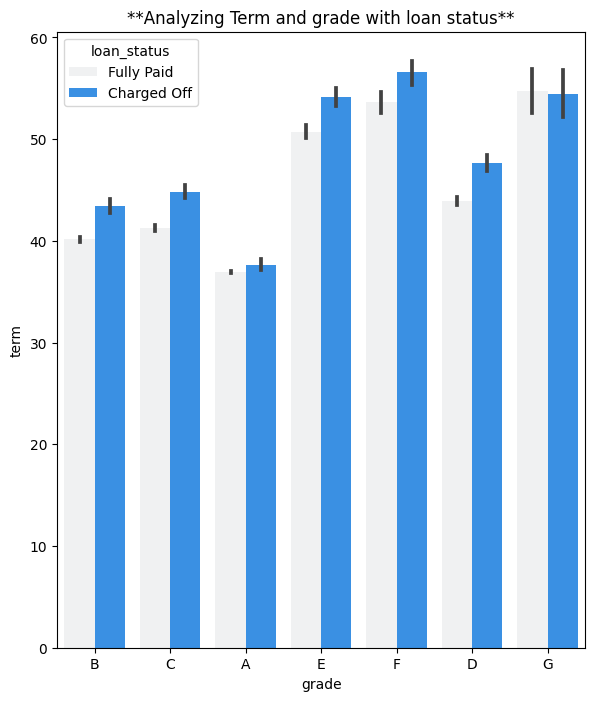

In [56]:
#  analyzing the term with laon status with grade
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data=loan_df_cleaned, y = 'term',hue = 'loan_status', color ='dodgerblue', x = 'grade')
plt.title("**Analyzing Term and grade with loan status**")

plt.show()

**Observations from above plot:**

In this particular segment most charge off happened for grade F. Grade A,B C were close to 36 Term where as others are closing in for 60 Terms

4. Funded Amount

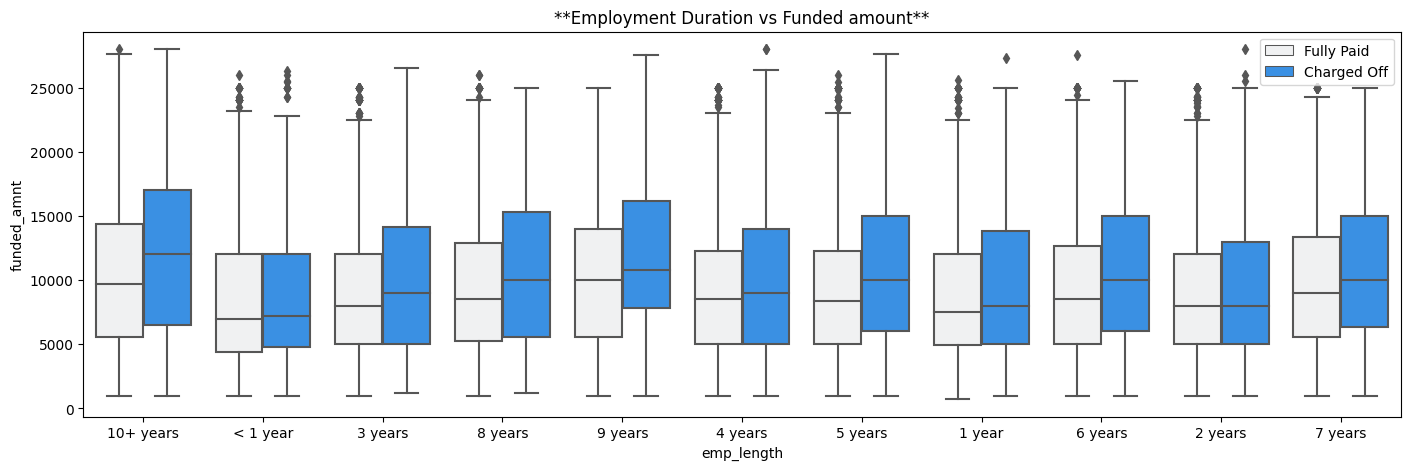

In [57]:
#  analyzing the funded amount
plt.figure(figsize=(17,5))
sns.boxplot(x='emp_length', y='funded_amnt', data=loan_df_cleaned, color ='dodgerblue', hue ='loan_status' )
plt.title('**Employment Duration vs Funded amount**')
plt.legend(loc='upper right')
plt.show()

**Observations from above plot:**

In this particular segment we can observe the funded amount was more in 10+ years segment. Only <1 Year category has a equally paid and charged off ratio of funded amount.  

5. Interest Rate

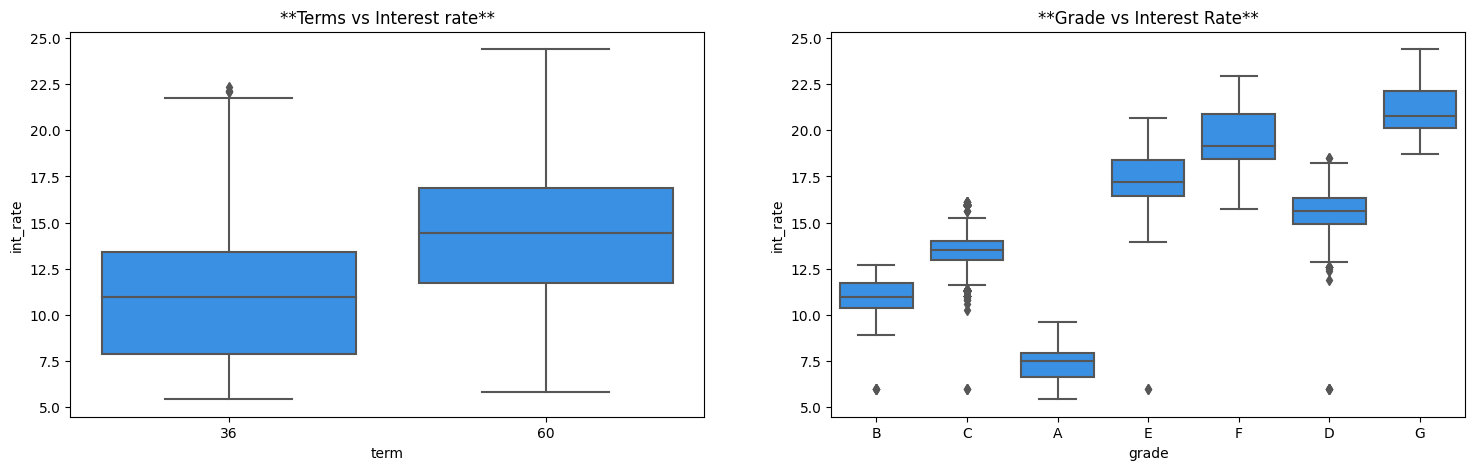

In [58]:
#  analyzing the interest rate

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='int_rate', data=loan_df_cleaned,color ='dodgerblue' )
plt.title('**Terms vs Interest rate**')

plt.subplot(1,2,2)
plt.title('**Grade vs Interest Rate**')
sns.boxplot(x='grade', y='int_rate', data=loan_df_cleaned,color ='dodgerblue')
plt.show()

**Observations from above plot:**

In this particular segment we can observe the interest rate is higher with 60 terms and the interest rate increases as we move from Grade A to G, with G being the hightest. 

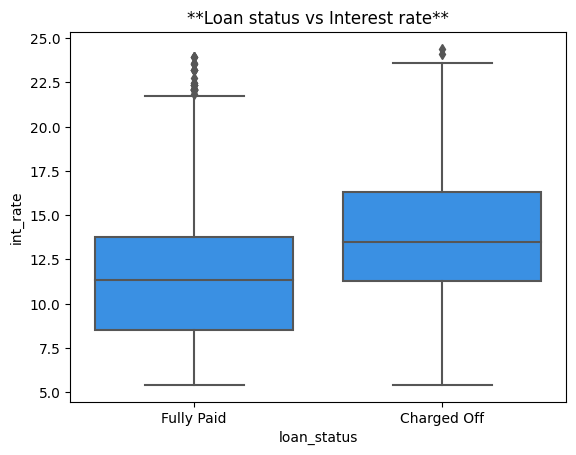

In [59]:
#  analyzing the interest rate
sns.boxplot(x='loan_status', y='int_rate', data=loan_df_cleaned,color ='dodgerblue')
plt.title('**Loan status vs Interest rate**')
plt.show()

**Observations from above plot:**

In this particular segment we can observe the interest rate is higher with charged off, that means with higher interest rate chances for charge off becomes more probable

6. DTI (Debit to income ratio)

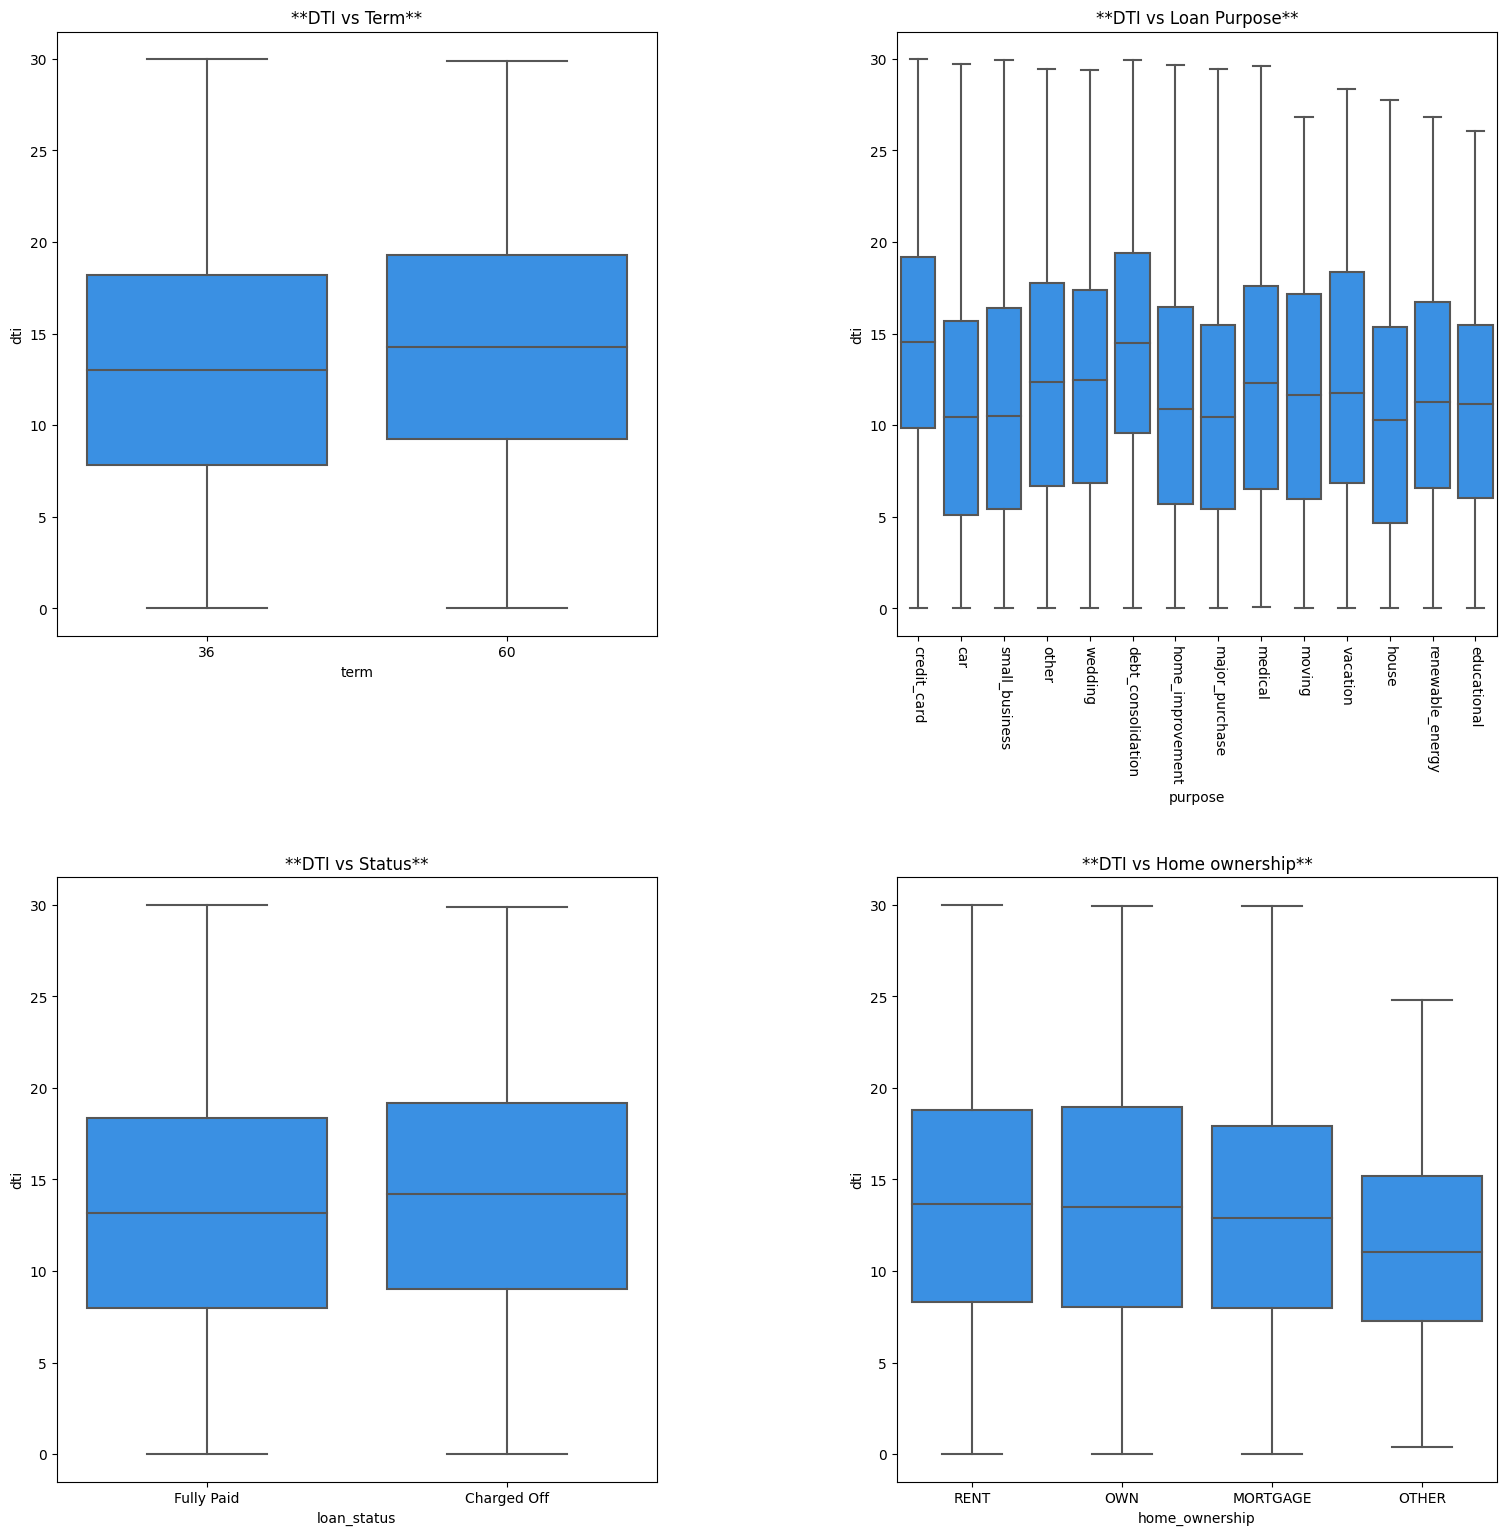

In [60]:
#  analyzing the DTI
plt.figure(figsize=(18,5))
plt.subplot(2,2,1)
sns.boxplot(x='term', y='dti', data=loan_df_cleaned,color ='dodgerblue')
plt.title('**DTI vs Term**')


plt.subplot(2,2,2)
plt.title('**DTI vs Loan Purpose**')
sns.boxplot(x='purpose', y='dti', data=loan_df_cleaned,color ='dodgerblue')
plt.xticks(rotation = -90)
print()

plt.subplot(2,2,3)
plt.title('**DTI vs Status**')
sns.boxplot(x='loan_status', y='dti', data=loan_df_cleaned,color ='dodgerblue')


plt.subplot(2,2,4)
plt.title('**DTI vs Home ownership**')
sns.boxplot(x='home_ownership', y='dti', data=loan_df_cleaned,color ='dodgerblue')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

**Observations from above plot:**

In this particular segment we can observe the DTI is higher for 60 months term, purpose for loan is debt_consolidation followed by credit_card.
DTI shows higher values for charged off loan which makes sense, as the DTI is higher it led to defaulting.
The home ownership with type OTHER has less DTI, as they may have not taken much loan to reflect in DTI. Rent and Own have high DTI

7. Bankrupt public report 

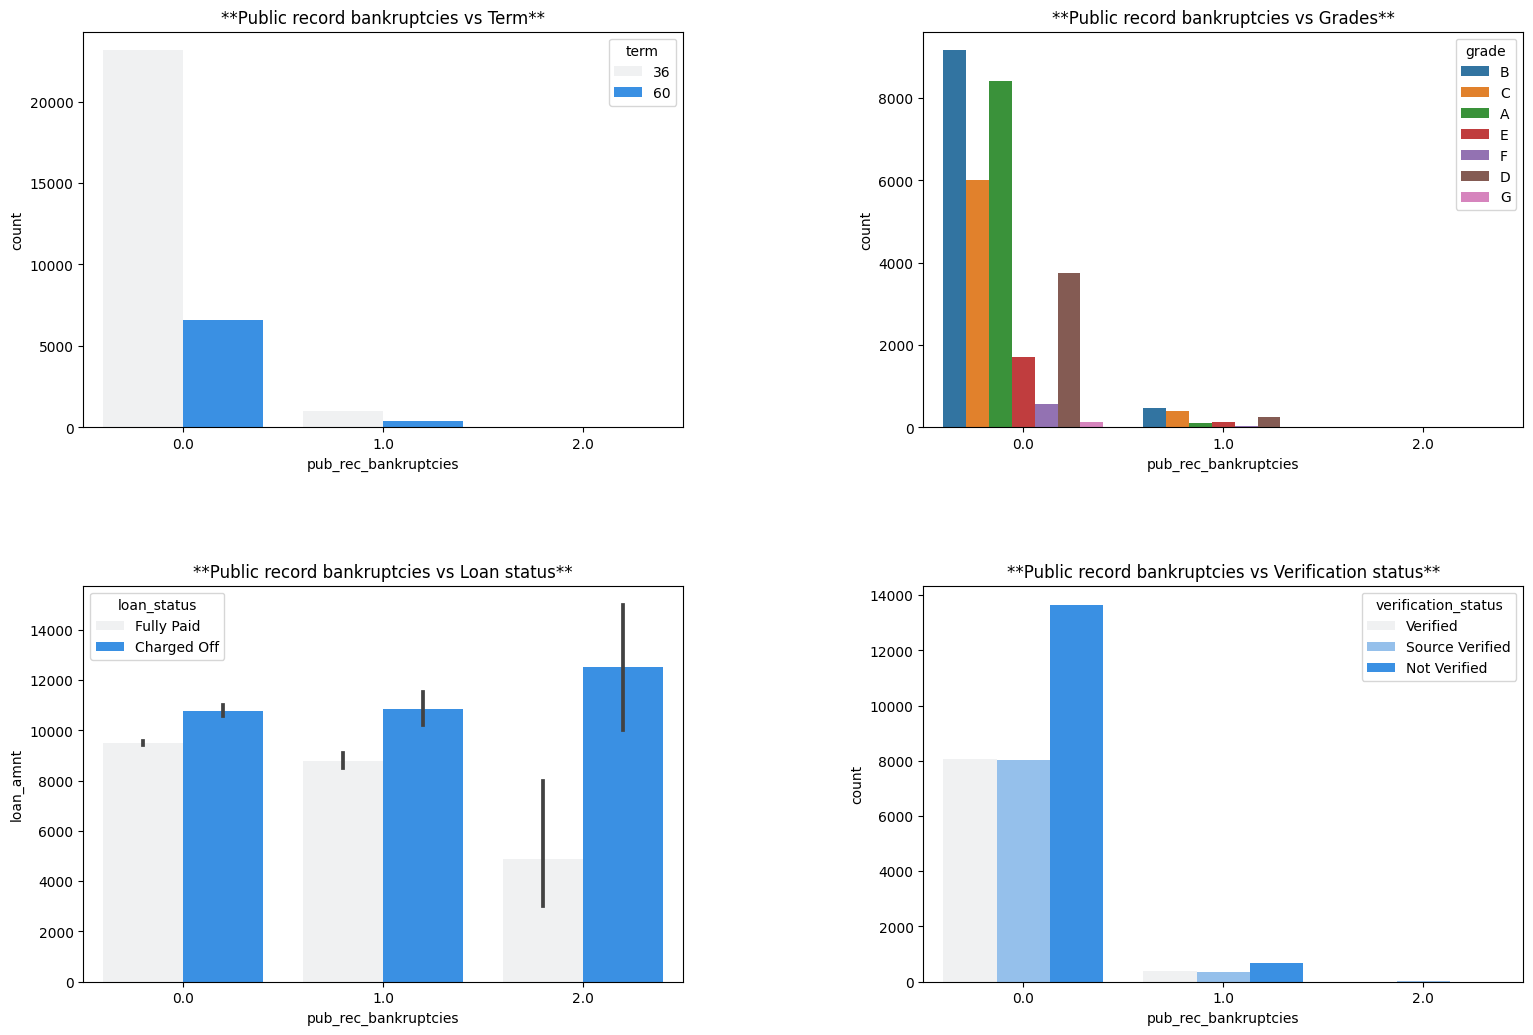

In [61]:
#  analyzing bankrupt records.

plt.figure(figsize=(18,5))
plt.subplot(2,2,1)
sns.countplot(x='pub_rec_bankruptcies', hue='term', data=loan_df_cleaned,color ='dodgerblue')
plt.title('**Public record bankruptcies vs Term**')


plt.subplot(2,2,2)
plt.title('**Public record bankruptcies vs Grades**')
sns.countplot(x='pub_rec_bankruptcies', hue='grade', data=loan_df_cleaned)
              
plt.subplot(2,2,3)             
sns.barplot(x='pub_rec_bankruptcies',y= 'loan_amnt', hue='loan_status', data=loan_df_cleaned,color ='dodgerblue')
plt.title('**Public record bankruptcies vs Loan status**')
              

plt.subplot(2,2,4)
plt.title('**Public record bankruptcies vs Verification status**')
sns.countplot(x='pub_rec_bankruptcies', hue='verification_status', data=loan_df_cleaned,color ='dodgerblue')
              
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
              
plt.show()

**Observations from above plot:**

In this particular segment we can observe the bankruptcies are majorly 0 for each category. Some from Grade C, B show some part of bankruptcies.

8. Analyzing binned Loan amount

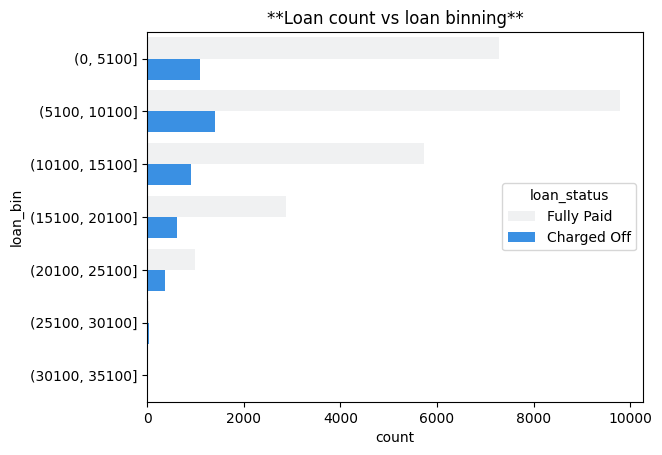

In [62]:
#  analyzing the binned loan amount
sns.countplot(y='loan_bin', data=loan_df_cleaned,color ='dodgerblue', hue = 'loan_status')
plt.title('**Loan count vs loan binning**')
plt.show()

**Observations from above plot:**

The above plot shows that the charged off loan was in the category for 5k to 10k.

9. Analyzing loan status

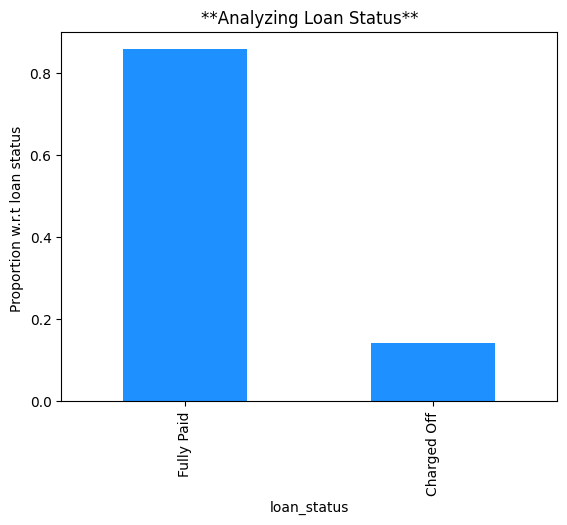

In [63]:
#  analyszing the loan status percentage

loan_df_cleaned.loan_status.value_counts(normalize=True).plot.bar(color="dodgerblue")
plt.title("**Analyzing Loan Status**")
plt.ylabel("Proportion w.r.t loan status ")
plt.show()

**Observations from above plot:**

The above plot shows that fully paid percentage is higher than 80%, charged off is litter lower than 20%

10. Purpose

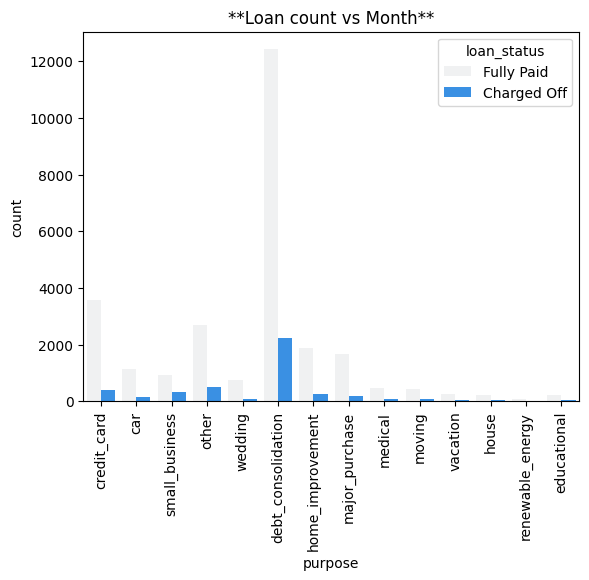

In [81]:
#  analyszing the loan purpose

sns.countplot(data=loan_df_cleaned, x = 'purpose',hue='loan_status',color ='dodgerblue')
plt.title('**Loan count vs Purpose**')
plt.xticks(rotation =90)
plt.show()

**Observations from above plot:**

The above plot shows that debt consolidation has higher charge off proportions

# Inference from Univariate Analysis 

* More than 80% of loan are fully paid.
* Public bankruptcies are majorly less, close to 90%
* 30 Month term is preferred over 60-month term
* There were more number of borrowers with > 10+ years of experience with highest funded amount.
* DTI was on the higher end where the charge off happened, which signifies as the debit amount rose, the chances of repayment went down.
* Highest amount of loan was requested in December month. The loan amount increased year by year and and highest in 2011.
* * The loan amount mean was around 8500, where 75% of borrowers had loan amount under 13000
* The funded amount mean around 8400, where 75% of borrowers had received 12800 as funded amount. So, most the loan request were approved.
* The salary had a mean around 54000 and after removing the outliers the maximum stands at 140000
* The interest rate had a mean around 11%, the maximum was set around 24%. 
* 75% of installment amount was around 380 and maximum was around 934.
* Around 52% stayed in Rented home, followed by Mortgage which is 40%
* A lot of application was not verified which was around 46%, followed by verified at 27%
* The major reason for taking loan was debt_consolidation, which is over 40%
* More than 30% from the list belong to Grade B, followed by Grade A.
* Loan amount of 5k to 10k was most preferred loan amount.




# Bivariate Analysis

1. Loan amount vs Funded Amount

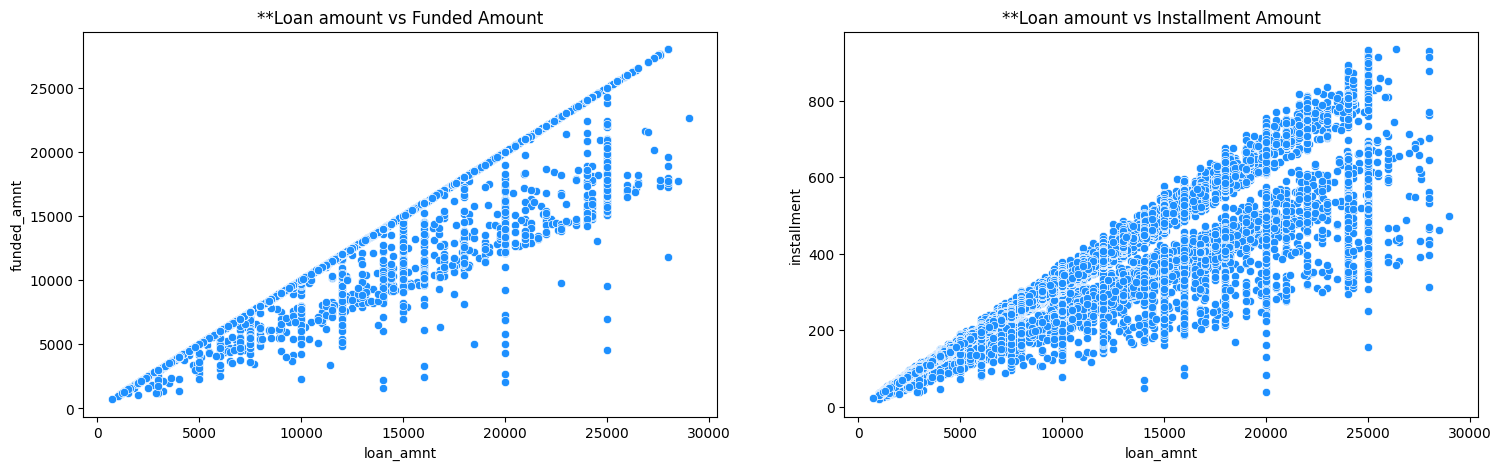

In [64]:
#  analyzing loan amount vs funded amount
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.scatterplot(x='loan_amnt', y='funded_amnt', data=loan_df_cleaned,color ='dodgerblue')
plt.title(f'**Loan amount vs Funded Amount')

plt.subplot(1,2,2)
sns.scatterplot(x='loan_amnt', y='installment', data=loan_df_cleaned,color ='dodgerblue')
plt.title(f'**Loan amount vs Installment Amount')
plt.show()

**Observations from above plot:**

There is a majorly a linear relationship with the variables. This also proves none of them got more funded amount then requested. The installment amount increases steadily for increasing loan amount.

2. Address State vs charged off and paid

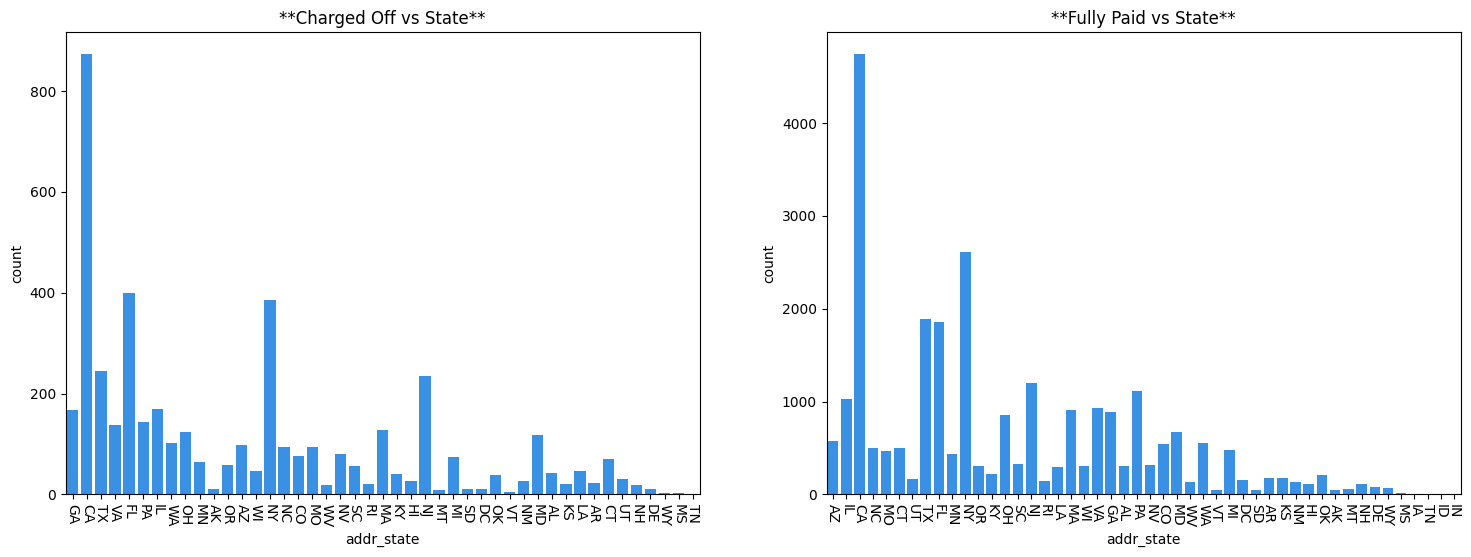

In [65]:
#  analyzing the loan staus with state

plt.figure(figsize=(18,6))

chrg_off = loan_df_cleaned[loan_df_cleaned.loan_status.values == 'Charged Off']

plt.subplot(1,2,1)
sns.countplot(x='addr_state', data=chrg_off,color ='dodgerblue')
plt.title('**Charged Off vs State**')
plt.xticks(rotation = -90)

fully_paid = loan_df_cleaned[loan_df_cleaned.loan_status.values == 'Fully Paid']

plt.subplot(1,2,2)
sns.countplot(x='addr_state', data=fully_paid,color ='dodgerblue')
plt.title('**Fully Paid vs State**')
plt.xticks(rotation = -90)
plt.show()





**Observations from above plot:**

From the above plots it is clear that the states CA,NY and FL have more charged off loan. Whereas CA,NY,TX has more fully paid loans.

3. DTI vs loan amount vs interest rate

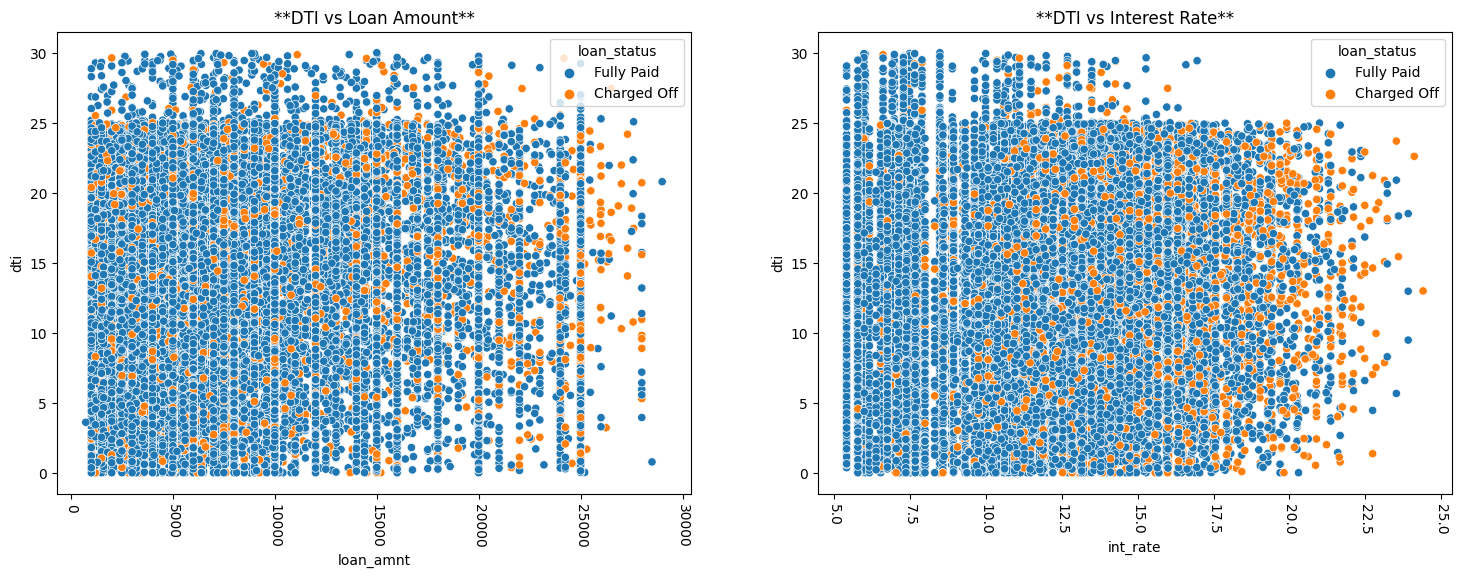

In [66]:
#  analyzing the DTI with loan amount and interest rate.

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.scatterplot(x='loan_amnt', data=loan_df_cleaned, y = 'dti',hue='loan_status')
plt.title('**DTI vs Loan Amount**')
plt.xticks(rotation = -90)

plt.subplot(1,2,2)
sns.scatterplot(x='int_rate', data=loan_df_cleaned, y = 'dti',hue='loan_status')
plt.title('**DTI vs Interest Rate**')
plt.xticks(rotation = -90)
plt.show()


**Observations from above plot:**

The above plots are densely spread across. No specific inference is clear from the plots.

**Observations from above plot:**

Debt consolidation is topping the chart, another inference can be drawn is there are some less dense values when loan amount closes 20000 for last 6 purposes like medical, moving, vacation, house etc. 

 4. Loan Month vs. Loan Status

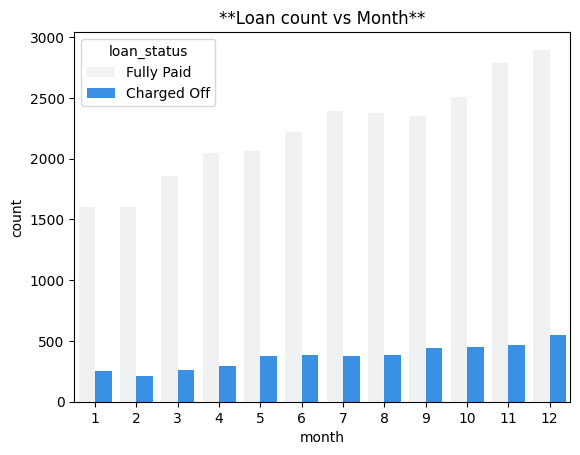

In [68]:
#  analyszing the loan request per month along with status
sns.countplot(data=loan_df_cleaned, x = 'month',hue='loan_status',color ='dodgerblue')
plt.title('**Loan count vs Month**')
plt.show()

**Observations from above plot:**

Most of loan request were from the December month in both the category fully paid and charged off. The minimum in both category is in Feb.

5. Loan Quarter vs. Loan Status

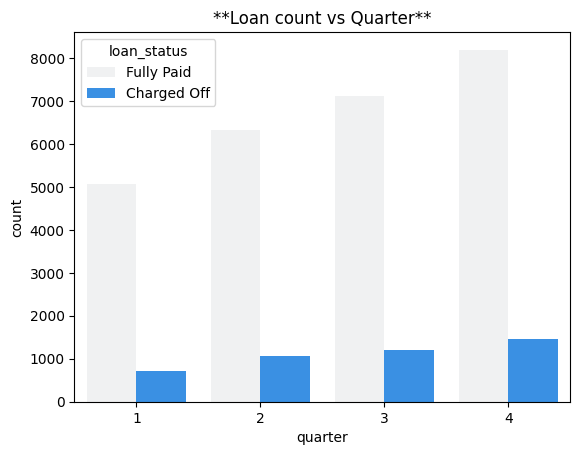

In [69]:
#  analyszing the loan request per quarter along with status
sns.countplot(data=loan_df_cleaned, x = 'quarter',hue='loan_status',color ='dodgerblue')
plt.title('**Loan count vs Quarter**')
plt.show()

**Observations from above plot:**

Most of loan request were from the Q4 in both the category fully paid and charged off. The minimum in both category is Q1.Q4 has lot of festivities which may be spiked up the numbers. 

6. Home Ownership vs. Loan Status

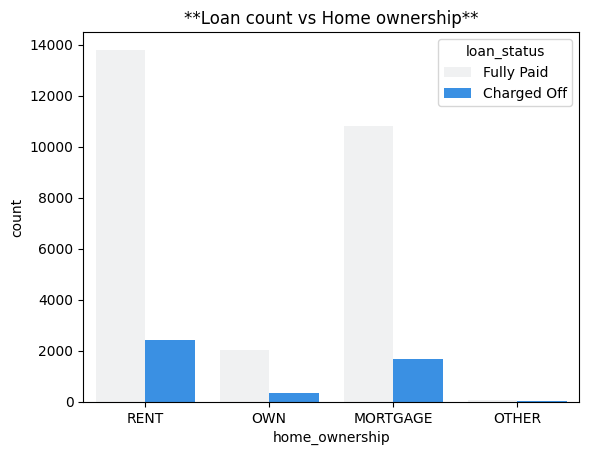

In [70]:
#  analyszing the loan status with home ownership
sns.countplot(data=loan_df_cleaned, x = 'home_ownership',hue='loan_status',color ='dodgerblue')
plt.title('**Loan count vs Home ownership**')
plt.show()

**Observations from above plot:**

Borrowers staying in rented house or mortgaged house are showing more chances of defaulting.


7. Home Ownership vs. Loan Status

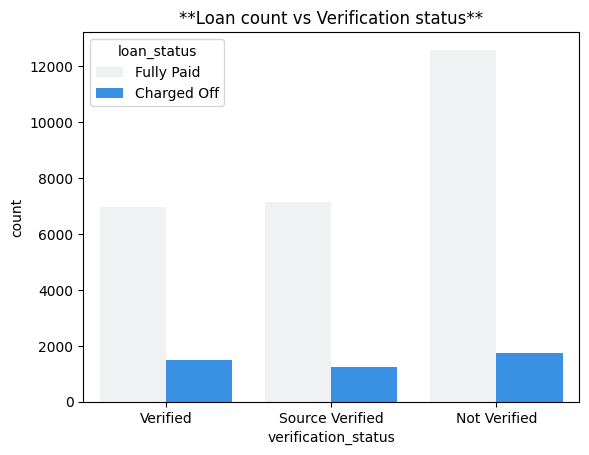

In [71]:
#  analyszing the loan status with verification status
sns.countplot(data=loan_df_cleaned, x = 'verification_status',hue='loan_status',color ='dodgerblue')
plt.title('**Loan count vs Verification status**')
plt.show()

**Observations from above plot:**

Not verified tops the chart who were charged off, the verification process is important to get the loans paid


8. Analysis with DTI

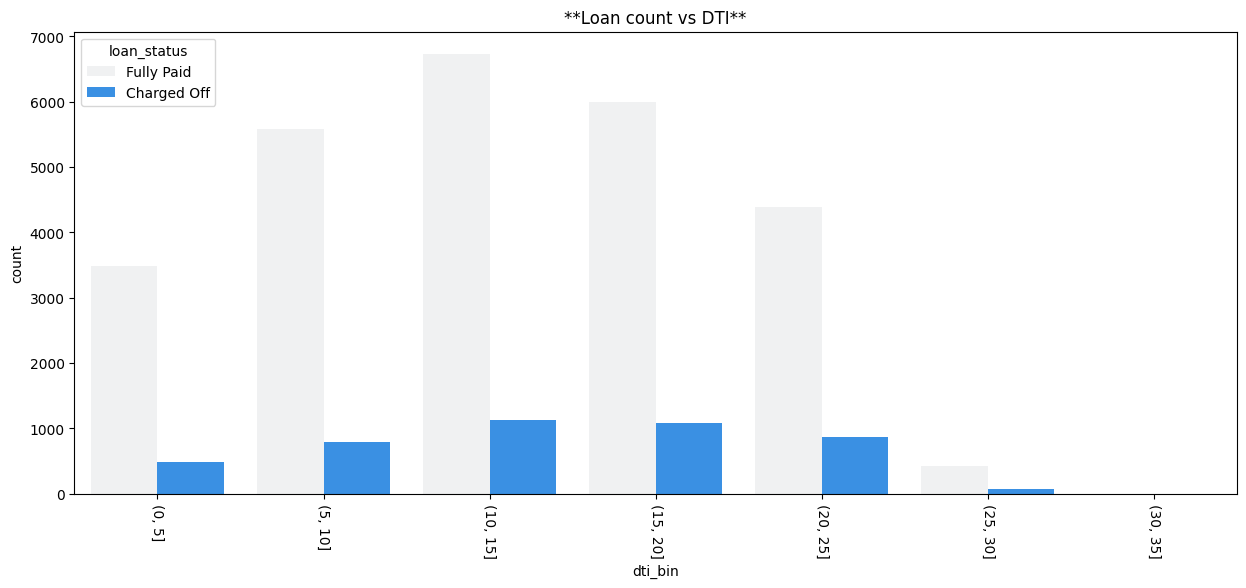

In [72]:
#  analyzing the DTI binning with status.

plt.figure(figsize=(15,6))
sns.countplot(data=loan_df_cleaned, x = 'dti_bin',color ='dodgerblue', hue = 'loan_status')
plt.title('**Loan count vs DTI**')
plt.xticks(rotation = -90)
plt.show()

**Observations from above plot:**

From the DTI binning plot, it is clear that the charged off is high for DTI range close to 10 to 20%


9. Analysis with Sub Grade

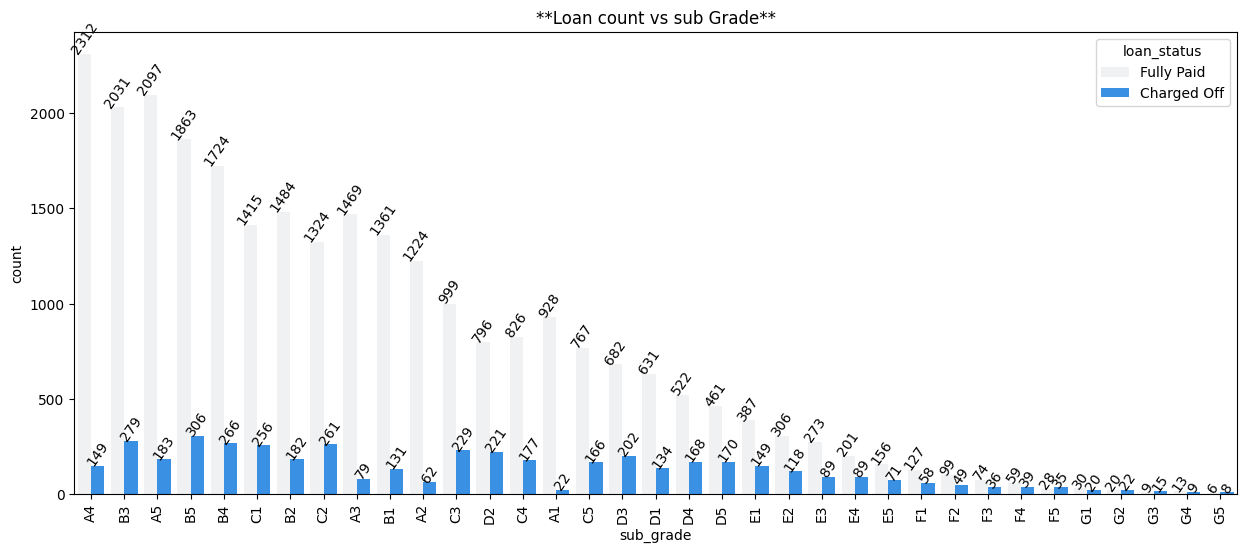

In [73]:
plt.figure(figsize=(15,6))

#  analyszing the sub grade with count of loan
ax=sns.countplot(data=loan_df_cleaned, x = 'sub_grade',hue='loan_status',color ='dodgerblue',order = loan_df_cleaned['sub_grade'].value_counts().index)
plt.title('**Loan count vs sub Grade**')
plt.xticks(rotation= 90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1 , f'{int(height)}', ha="center",rotation= 55)

plt.show()

**Observations from above plot:**

The charged off are from B5, B3, C1 and C2 sub grade on the higher side.

10. Analysis with Sub Grade

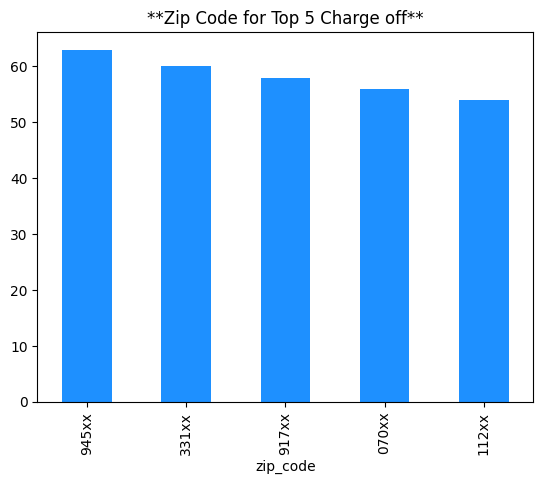

In [74]:
#  analyzing the zip code for top 5 charge off

df_zip_charged_off = loan_df_cleaned[loan_df_cleaned['loan_status']== 'Charged Off'].groupby('zip_code')['zip_code'].count().sort_values(ascending = False).head()
df_zip_charged_off.plot.bar(x = 'index', y = 'values',color ='dodgerblue')
plt.title('**Zip Code for Top 5 Charge off**')
plt.show()


**Observations from above plot:**

The most charged off zip code is 945xx followed by 331xx

11. Grade vs Interest Rate

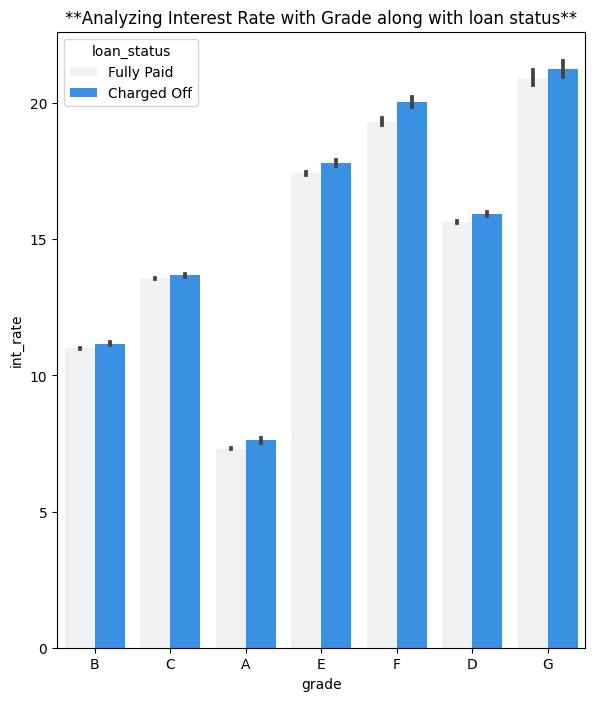

In [75]:
#  analyzing the term with loan status with grade
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data=loan_df_cleaned, y = 'int_rate',hue = 'loan_status', color ='dodgerblue', x = 'grade')
plt.title("**Analyzing Interest Rate with Grade along with loan status**")

plt.show()

**Observations from above plot:**

The high interest rate more than 20% is showing more charge off situation from the above plot of Grade F and G

# Multi Variate Analysis

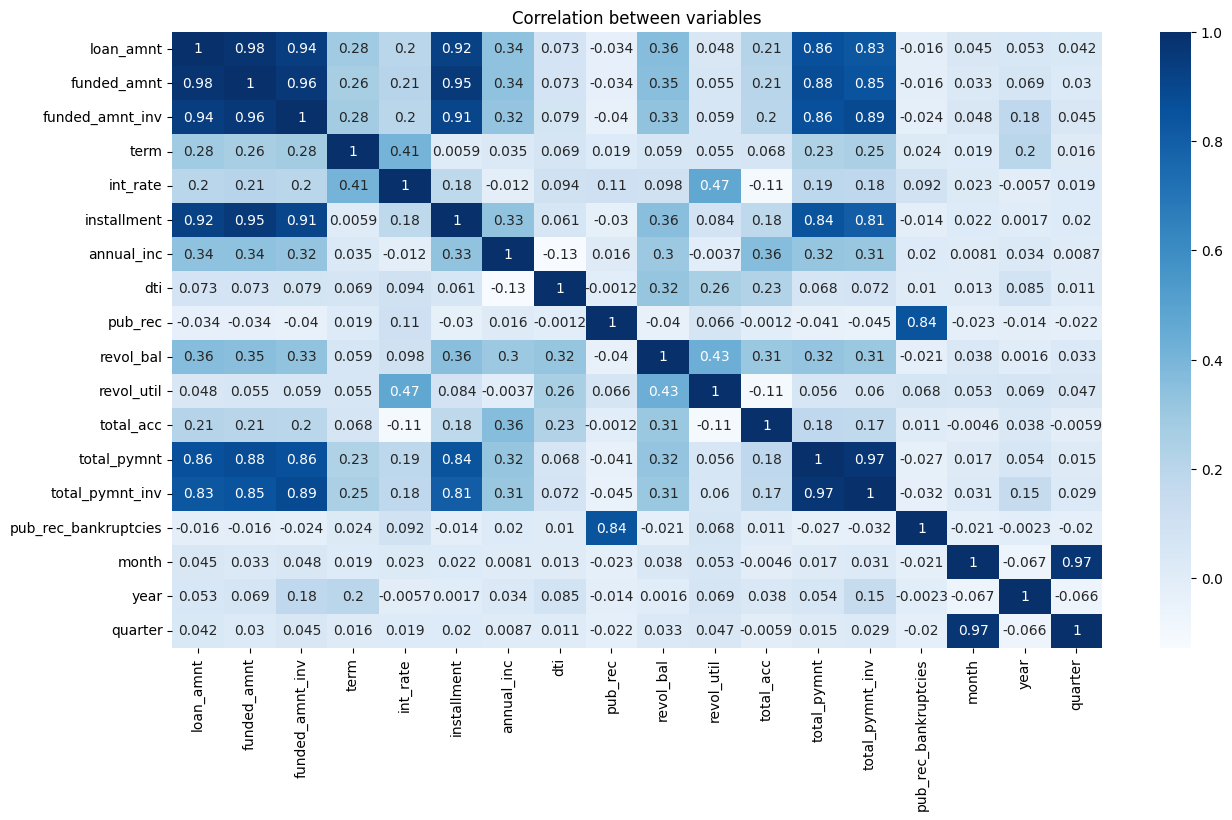

In [76]:
#  finding the correlation between the variables.
plt.figure(figsize=(15,8))
sns.heatmap(loan_df_cleaned.corr(numeric_only=True),annot=True,cmap='Blues')
plt.title("Correlation between variables")
plt.show()

**Observations from above plot:**

* Public record bankruptcies are highly correlated with public records, other variables are not correlated or negatively correlated.
* Total payment is highly correlated with loan amount, funded amount and funded amount investor.
* Installment shows high correlation with total payment and total payment investor
* Month, year and quarter are less correlated with other variables.
* Revolving balance is not highly correlated with other variables.



# Inference from Bivariate Analysis 

* The funded amount and loan amount shows high correlation which signifies in most of the cases the amount is approved.
* CA state has more than 800 charged off situation followed by FL which is close to 400. Also, most of the full payment happened from CA, so only state cannot be used for decision.
* Quarter 4 has seen a greater number of loans and also higher on the charge off situation.
* Not verified status has a greater number of charge off, so verification is mandatory going forward for new applicants.
* Charge off was majorly seen for sub grade B5, B3, C1 and C2.
* In the zip code analysis is the top 3 charge off happened from zip codes
    945xx, 331xx, 917xx where as the top 3 for full payment was from 112xx, 606xx and 100xx. This could be an indicating factor.
* Charge off has shown a higher DTI in general
* Higher interest rate also risks towards charge off.
* Grade F and G has on the higher end of borrowing money and also, they are in the higher interest rate bucket leading to more charge off.
* Home ownership having rent or mortgage has paid fully compared to other categories.
* The median amount of charge off is around 15k